In [1]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

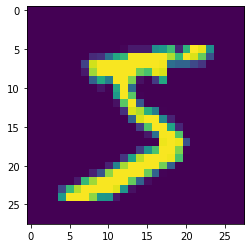

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))

In [7]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics="accuracy")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_train = X_train.reshape(60000,28*28)
X_train = X_train.astype("float32")/255

X_test = X_test.reshape(10000,28*28)
X_test = X_test.astype("float32")/255

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2548 - accuracy: 0.9270
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1026 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0682 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0494 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0369 - accuracy: 0.9888


In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9783


[0.07780137658119202, 0.9782999753952026]